In [1]:
import pandas as pd
import numpy as np

In [2]:
cou =pd.read_csv('courses.csv')

nov =pd.read_csv('reg-month1.csv')
dec =pd.read_csv('reg-month2.csv')
stu =pd.read_csv('students.csv')
match =pd.read_csv('matches.csv')
deli = pd.read_csv('deliveries.csv')

pd.concat
df.concat
ignore index
multindex
concat dataframes

In [3]:
Regi =pd.concat([nov,dec],axis=0)

In [4]:
Regi.tail(3)

,student_id,course_id
25,42,9
26,50,8
27,38,1


multiindex keys 


In [5]:
multi =pd.concat((nov,dec),keys=['nov','dec'],axis=0)

In [6]:
multi.head(2)

student_id  course_id
nov 0          23          1
    1          15          5

In [7]:
multi.loc[('nov',1)]

student_id    15
course_id      5
Name: (nov, 1), dtype: int64

In [8]:
multi.loc[('dec',0)]

student_id    3
course_id     5
Name: (dec, 0), dtype: int64


merging

INNER Join

In [9]:
stu.merge(multi,how='inner',on='student_id').tail(5)

,student_id,name,partner,course_id
45,23,Chhavi Lachman,18,9
46,23,Chhavi Lachman,18,5
47,24,Radhika Suri,17,4
48,25,Shashank D’Alia,2,1
49,25,Shashank D’Alia,2,10


find total revenu generated by company

In [10]:
total = multi.merge(cou,how='inner',on='course_id')['price']

In [11]:
total.tail(3)

50     699
51    1099
52    2499
Name: price, dtype: int64

In [12]:
total.sum()

np.int64(154247)

find month by month revenue

In [13]:
temp = pd.concat([nov,dec],keys=['nov','dec']).reset_index()

In [14]:
temp.tail(5)

,level_0,level_1,student_id,course_id
48,dec,23,14,1
49,dec,24,11,10
50,dec,25,42,9
51,dec,26,50,8
52,dec,27,38,1


In [15]:
temp.merge(cou,how="inner",on='course_id').groupby('level_0')['price'].sum()

level_0
dec    65072
nov    89175
Name: price, dtype: int64

cols -> name -> course-> price

In [16]:
multi.merge(stu,on='student_id').merge(cou,on='course_id').reset_index()[['name','course_name','price']]

,name,course_name,price
0,Chhavi Lachman,python,2499
1,Preet Sha,tableau,2499
2,Fardeen Mahabir,power bi,1899
3,Chhavi Lachman,machine learning,9999
4,Elias Dodiya,plotly,699
5,Fardeen Mahabir,python,2499
6,Kailash Harjo,python,2499
7,Tarun Thaker,pandas,1099
8,Yash Sethi,data analysis,4999
9,Preet Sha,python,2499


find course per revenu generated

In [17]:
multi.merge(cou,on='course_id').groupby('course_name')['price'].sum()

course_name
data analysis       24995
machine learning    39996
ms sxcel             7995
pandas               4396
plotly               3495
power bi            11394
pyspark             14994
python              22491
sql                  6998
tableau             17493
Name: price, dtype: int64

<Axes: xlabel='course_name'>

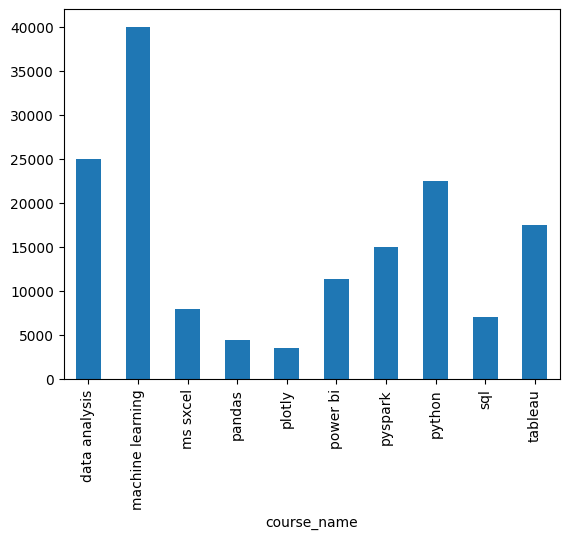

In [18]:
multi.merge(cou,on='course_id').groupby('course_name')['price'].sum().plot(kind='bar')

find the student who entrolled in both the month

In [19]:
both = np.intersect1d(dec['student_id'],nov['student_id'])

In [20]:
both

array([ 1,  3,  7, 11, 16, 17, 18, 22, 23])

In [21]:
stu[stu['student_id'].isin(both)]

,student_id,name,partner
0,1,Kailash Harjo,23
2,3,Parveen Bhalla,3
6,7,Tarun Thaker,9
10,11,David Mukhopadhyay,20
15,16,Elias Dodiya,25
16,17,Yasmin Palan,7
17,18,Fardeen Mahabir,13
21,22,Yash Sethi,21
22,23,Chhavi Lachman,18


find course where not studenet enrooled

In [22]:
diff =np.setdiff1d(cou['course_id'],multi['course_id'])


In [23]:
diff

array([11, 12])

In [24]:
cou[cou['course_id'].isin(diff)]

,course_id,course_name,price
10,11,Numpy,699
11,12,C++,1299


find the student who not endroll in any course

In [25]:
notentro= np.setdiff1d(stu['student_id'],multi['student_id'])

In [26]:
stu[stu['student_id'].isin(notentro)].count()

student_id    7
name          7
partner       7
dtype: int64

<Axes: >

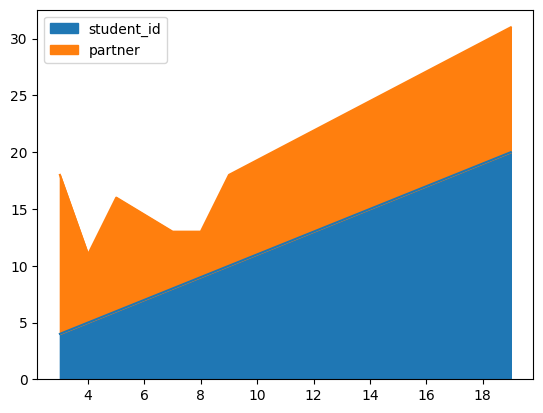

In [27]:
stu[stu['student_id'].isin(notentro)].plot(kind='area')

self join

In [28]:
stu

,student_id,name,partner
0,1,Kailash Harjo,23
1,2,Esha Butala,1
2,3,Parveen Bhalla,3
3,4,Marlo Dugal,14
4,5,Kusum Bahri,6
5,6,Lakshmi Contractor,10
6,7,Tarun Thaker,9
7,8,Radheshyam Dey,5
8,9,Nitika Chatterjee,4
9,10,Aayushman Sant,8


In [29]:
stu.merge(stu,how='inner',left_on='partner',right_on='student_id')[['name_x','name_y']]

,name_x,name_y
0,Kailash Harjo,Chhavi Lachman
1,Esha Butala,Kailash Harjo
2,Parveen Bhalla,Parveen Bhalla
3,Marlo Dugal,Pranab Natarajan
4,Kusum Bahri,Lakshmi Contractor
5,Lakshmi Contractor,Aayushman Sant
6,Tarun Thaker,Nitika Chatterjee
7,Radheshyam Dey,Kusum Bahri
8,Nitika Chatterjee,Marlo Dugal
9,Aayushman Sant,Radheshyam Dey


toop 3 student who did most entrollment

In [30]:
stu

,student_id,name,partner
0,1,Kailash Harjo,23
1,2,Esha Butala,1
2,3,Parveen Bhalla,3
3,4,Marlo Dugal,14
4,5,Kusum Bahri,6
5,6,Lakshmi Contractor,10
6,7,Tarun Thaker,9
7,8,Radheshyam Dey,5
8,9,Nitika Chatterjee,4
9,10,Aayushman Sant,8


top 3 student who did most entrollment

In [31]:
m =multi.merge(stu).groupby(['student_id','name'])['partner'].count().sort_values(ascending=0)

In [32]:
m.head()

student_id  name            
23          Chhavi Lachman      6
7           Tarun Thaker        5
14          Pranab Natarajan    4
1           Kailash Harjo       4
16          Elias Dodiya        4
Name: partner, dtype: int64

find top 3 student how spent more amount on course

In [33]:
spent =multi.merge(stu,on='student_id').merge(cou,on='course_id').groupby(['student_id','name'])['price'].sum()

In [34]:
spent.sort_values(ascending=0).head(5)

student_id  name            
23          Chhavi Lachman      22594
14          Pranab Natarajan    15096
19          Qabeel Raman        13498
7           Tarun Thaker        10595
24          Radhika Suri         9999
Name: price, dtype: int64

ipl merging and joing question started

six and stadium ratio which stadium have more six in entire match ratio

In [35]:
data  = deli.merge(match,left_on='match_id',right_on='id')

In [36]:
data.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder', 'id', 'season', 'city', 'date', 'team1',
       'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied',
       'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue',
       'umpire1', 'umpire2', 'umpire3'],
      dtype='object')

In [116]:
data.loc[:,['player_dismissed']].head(1)

,player_dismissed
0,NaN


In [37]:
data.shape

(150460, 39)

In [38]:
data.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [39]:
six =data[data['batsman_runs']==6]

In [40]:
six.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
10,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,4,DA Warner,S Dhawan,A Choudhary,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [41]:
most =six.groupby('venue')['venue'].count().sort_values(ascending=0)

venue

In [120]:
venue = match.groupby('venue')['id'].count()

In [121]:
venue.sort_values(ascending=0).tail(5)

venue
Green Park                                      4
Buffalo Park                                    3
De Beers Diamond Oval                           3
Vidarbha Cricket Association Stadium, Jamtha    3
OUTsurance Oval                                 2
Name: id, dtype: int64

In [122]:
(most/venue).sort_values(ascending=0).head(4)

venue
Holkar Cricket Stadium                          17.600000
M Chinnaswamy Stadium                           13.227273
Sharjah Cricket Stadium                         12.666667
Himachal Pradesh Cricket Association Stadium    12.000000
dtype: float64


find orange cap holder of every season

already me merge we use data


In [45]:
data.groupby(['season','batsman'])['batsman_runs'].sum().reset_index().sort_values('batsman_runs',ascending=0)

,season,batsman,batsman_runs
1383,2016,V Kohli,973
1278,2016,DA Warner,848
684,2012,CH Gayle,733
910,2013,MEK Hussey,733
852,2013,CH Gayle,720
...,...,...,...
638,2011,VR Aaron,0
1467,2017,MM Patel,0
572,2011,ND Doshi,0
605,2011,S Nadeem,0


In [46]:
data.groupby(['season','batsman'])['batsman_runs'].sum().reset_index().sort_values('batsman_runs',ascending=0).drop_duplicates(subset=['season'],keep='first').sort_values('season',ascending=1)

,season,batsman,batsman_runs
115,2008,SE Marsh,616
229,2009,ML Hayden,572
446,2010,SR Tendulkar,618
502,2011,CH Gayle,608
684,2012,CH Gayle,733
910,2013,MEK Hussey,733
1088,2014,RV Uthappa,660
1148,2015,DA Warner,562
1383,2016,V Kohli,973
1422,2017,DA Warner,641


In [59]:
data.groupby(['season','batsman'])['batsman_runs'].sum().sort_values(ascending=0).reset_index().drop_duplicates(subset=['season']).sort_values('batsman_runs',ascending=0)

,season,batsman,batsman_runs
0,2016,V Kohli,973
2,2012,CH Gayle,733
3,2013,MEK Hussey,733
6,2014,RV Uthappa,660
7,2017,DA Warner,641
9,2010,SR Tendulkar,618
10,2008,SE Marsh,616
11,2011,CH Gayle,608
14,2009,ML Hayden,572
17,2015,DA Warner,562


<Axes: >

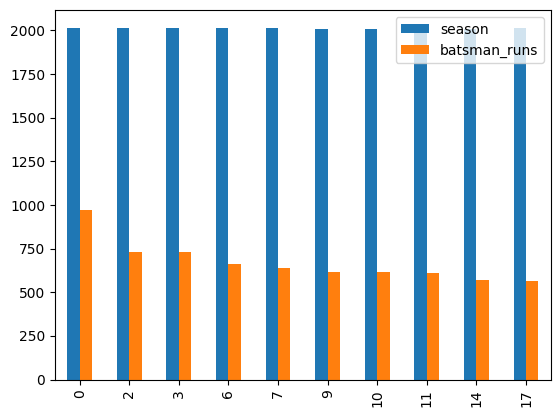

In [107]:
data.groupby(['season','batsman'])['batsman_runs'].sum().sort_values(ascending=0).reset_index().drop_duplicates(subset=['season']).sort_values('batsman_runs',ascending=0).plot(kind='bar')

purple cap holder

In [87]:
data.groupby(['season','bowler'])['player_dismissed'].count().sort_values(ascending=0).reset_index().drop_duplicates(subset=['season']).sort_values('season',ascending=0)

,season,bowler,player_dismissed
5,2017,B Kumar,28
16,2016,B Kumar,24
6,2015,DJ Bravo,28
10,2014,MM Sharma,26
0,2013,DJ Bravo,34
3,2012,M Morkel,30
2,2011,SL Malinga,30
29,2010,PP Ojha,22
11,2009,RP Singh,26
19,2008,Sohail Tanvir,24


<Axes: >

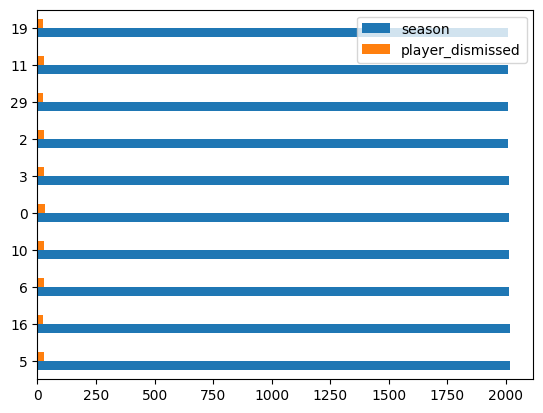

In [115]:
data.groupby(['season','bowler'])['player_dismissed'].count().sort_values(ascending=0).reset_index().drop_duplicates(subset=['season']).sort_values('season',ascending=0).plot(kind='barh')

In [94]:
data.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder', 'id', 'season', 'city', 'date', 'team1',
       'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied',
       'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue',
       'umpire1', 'umpire2', 'umpire3'],
      dtype='object')

no of super over played by each season

In [104]:
super =data.groupby(['season','team1','team2','winner','player_of_match'])['is_super_over'].max().sort_values(ascending=0).reset_index().drop_duplicates(subset=['season'],keep='first').sort_values('season',ascending=0)

In [105]:
super

,season,team1,team2,winner,player_of_match,is_super_over
6,2017,Gujarat Lions,Mumbai Indians,Mumbai Indians,KH Pandya,1
504,2016,Delhi Daredevils,Kolkata Knight Riders,Delhi Daredevils,CR Brathwaite,0
5,2015,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,SE Marsh,1
4,2014,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,JP Faulkner,1
2,2013,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,V Kohli,1
242,2012,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,RA Jadeja,0
171,2011,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,JA Morkel,0
0,2010,Kings XI Punjab,Chennai Super Kings,Kings XI Punjab,J Theron,1
1,2009,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,YK Pathan,1
7,2008,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,Sohail Tanvir,0
